<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning-Projects/blob/main/10.%20Customer%20Segmentation%20Using%20KMeans%20Clustering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Customer Segmentation Using KMeans Clustering**

### Issue

In today's competitive market, businesses need to understand their customers better to tailor their marketing strategies, improve customer satisfaction, and increase sales. However, with diverse customer bases, it can be challenging to identify distinct customer segments and their specific needs. Traditional methods of customer analysis may not efficiently handle large datasets or reveal meaningful patterns. This project aims to address this issue by using KMeans clustering to segment customers based on their demographics and behavioral data.

### Purpose

The purpose of this project is to apply KMeans clustering to a customer dataset to identify distinct segments within the customer base. By analyzing these segments, businesses can gain insights into different customer profiles, allowing for targeted marketing strategies, personalized customer service, and optimized product offerings. The project involves data preprocessing, clustering analysis, and visualization of the results to understand the characteristics of each customer segment.

### Key Features

- **Data Preprocessing:** Cleaning and normalizing customer data to prepare it for clustering analysis.
- **KMeans Clustering:** Applying KMeans algorithm to group customers into distinct clusters based on their attributes.
- **Cluster Analysis:** Examining the characteristics of each cluster to understand the differences and similarities between customer segments.
- **Visualization:** Creating 2D and 3D scatter plots to visually represent the customer segments and their attributes.
- **Cluster Descriptions:** Providing detailed descriptions of each cluster to facilitate understanding and application of the findings.

### How It Works

1. **Data Collection:** Load the customer dataset, which includes attributes such as age, income, years employed, and education.
2. **Data Preprocessing:** Remove irrelevant columns, handle missing values, and normalize the data to ensure consistency and accuracy in clustering.
3. **KMeans Clustering:** Apply the KMeans algorithm to the preprocessed data to group customers into a specified number of clusters (e.g., 3 clusters).
4. **Cluster Assignment:** Assign cluster labels to each customer in the dataset based on the clustering results.
5. **Cluster Analysis:** Calculate and analyze the average attributes for each cluster to understand the unique characteristics of each customer segment.
6. **Visualization:** Create 2D and 3D scatter plots to visualize the distribution of customers within each cluster and their attributes.
7. **Cluster Descriptions:** Provide detailed descriptions of each cluster, highlighting key characteristics such as average age, income, years employed, and education level.

### Example Use Case

- **Business Application:** A retail company wants to segment its customers to improve marketing strategies. By applying KMeans clustering, the company identifies distinct customer segments such as young professionals, middle-aged families, and retirees. This allows the company to tailor marketing campaigns, product recommendations, and customer service approaches to each segment, resulting in higher customer satisfaction and increased sales.


Initial Data:
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  

Cluster Analysis:
               Age       Edu  Years Employed      Income  Card Debt  \
cluster                                                               
0        43.000000  1.931973       17.197279  101.959184   4.220673   
1        31.891566  1.861446        3.963855   31.789157   1.57

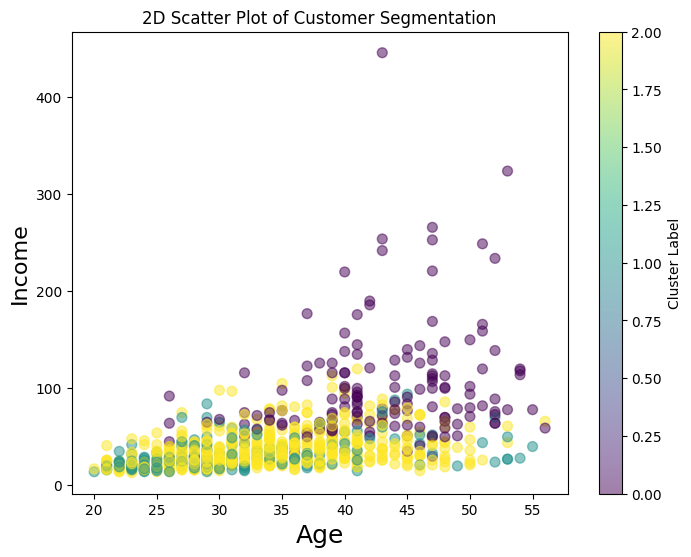

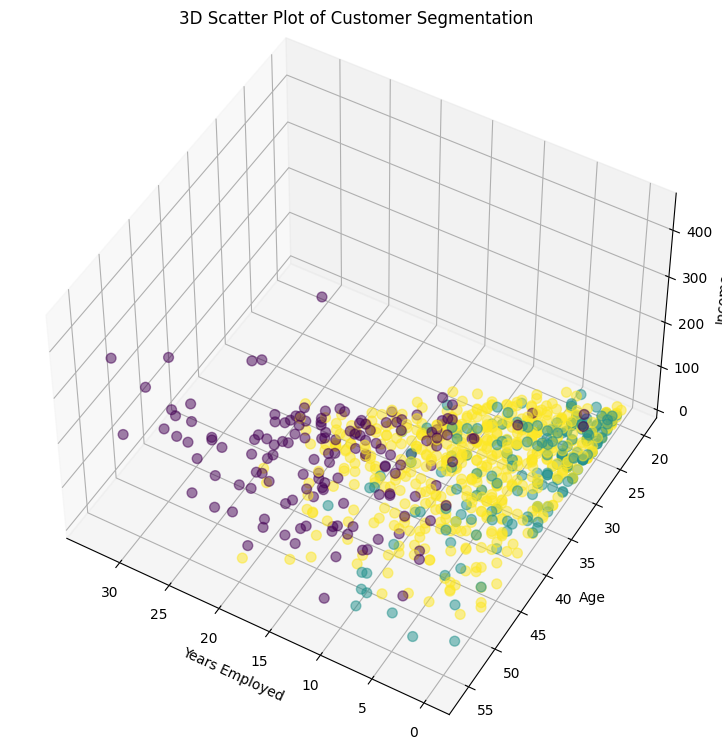

Cluster Descriptions:
Cluster 0 - Avg Age: 43.00, Avg Income: 101.96, Avg Years Employed: 17.20, Avg Education: 1.93
Cluster 1 - Avg Age: 31.89, Avg Income: 31.79, Avg Years Employed: 3.96, Avg Education: 1.86
Cluster 2 - Avg Age: 33.82, Avg Income: 36.14, Avg Years Employed: 7.63, Avg Education: 1.60


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Remove the Address and Customer Id columns
df.drop('Address', axis=1, inplace=True)
df.drop('Customer Id', axis=1, inplace=True)

# Normalize the data (excluding Customer ID)
X=np.nan_to_num(df) # Replaces NaNs (if any) with 0 and infinities with large finite numbers.
norm_data = StandardScaler().fit_transform(X)

# Apply KMeans clustering
k = 3
k_means = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
k_means.fit(norm_data)

# Assign cluster labels to the data
df['cluster'] = k_means.labels_

# Analyze the clusters
cluster_analysis = df.groupby('cluster').mean()
print("\nCluster Analysis:")
print(cluster_analysis)

# Visualization: 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c=k_means.labels_, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.title('2D Scatter Plot of Customer Segmentation')
plt.colorbar(label='Cluster Label')
plt.show()

# Visualization: 3D scatter plot
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.view_init(elev=48, azim=120)

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means.labels_.astype(float), cmap='viridis', marker='o', s=50, alpha=0.5)
plt.title('3D Scatter Plot of Customer Segmentation')
plt.show()

# Task: Describe each cluster
print("Cluster Descriptions:")
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    description = f"Cluster {i} -"
    description += f" Avg Age: {cluster_data['Age'].mean():.2f},"
    description += f" Avg Income: {cluster_data['Income'].mean():.2f},"
    description += f" Avg Years Employed: {cluster_data['Years Employed'].mean():.2f},"
    description += f" Avg Education: {cluster_data['Edu'].mean():.2f}"
    print(description)
